<a href="https://colab.research.google.com/github/zxcasd945/Test/blob/main/01Pythorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is x traintensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])
this is y traintensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820

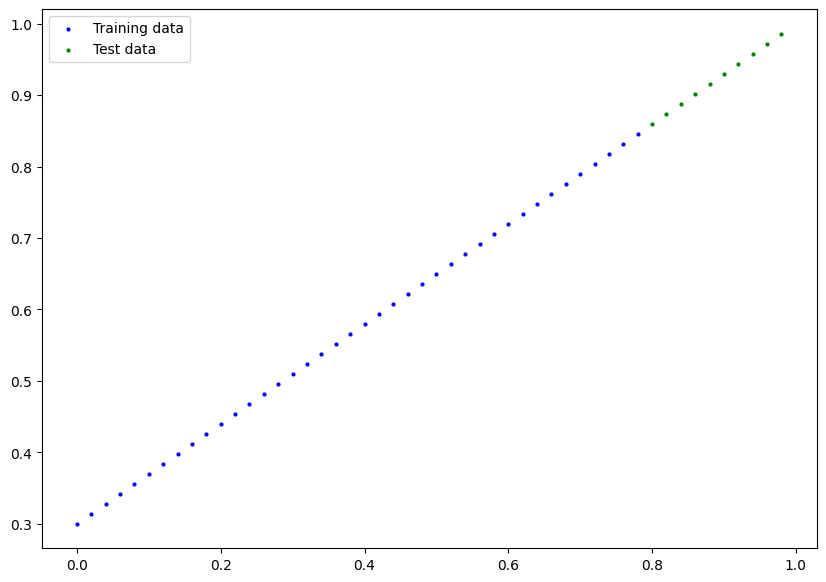

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02

X= torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(f'this is x train{X_train}')
print(f'this is y train{y_train}')
print(f'this is x test{X_test}')
print(f'this is y test{y_test}')
def plot_prediction(train_data=X_train, train_labels= y_train, test_data=X_test, test_labels= y_test, predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label='Test data')
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
  plt.legend(prop={'size':10})

plot_prediction()

tensor([[-2.1636],
        [-2.1881],
        [-2.2126],
        [-2.2371],
        [-2.2615],
        [-2.2860],
        [-2.3105],
        [-2.3350],
        [-2.3594],
        [-2.3839]])


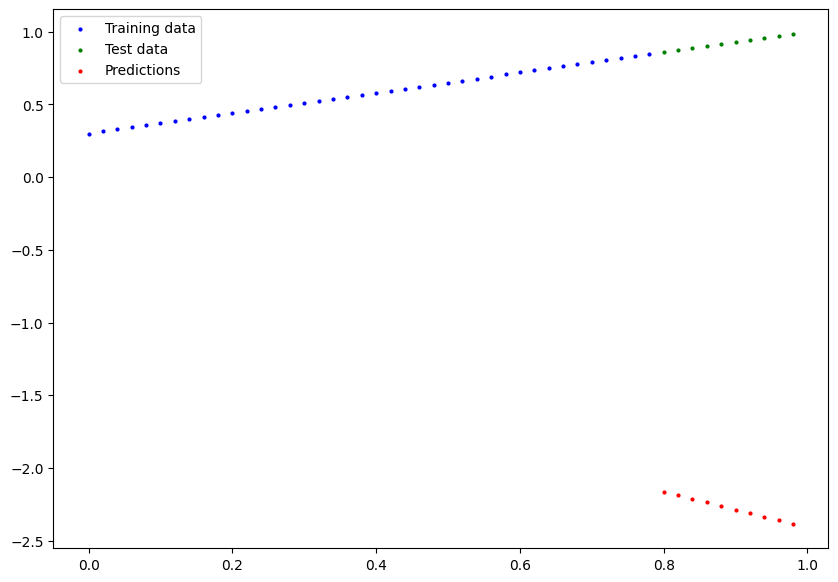

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x:torch.Tensor):
      return self.weights*x + self.bias
model_0= LinearRegressionModel()
with torch.inference_mode():
  y_preds= model_0(X_test)
print(y_preds)
plot_prediction(predictions=y_preds)

epoch = 0, loss=0.003962805960327387
epoch = 10, loss=0.003962805960327387
epoch = 20, loss=0.003962805960327387
epoch = 30, loss=0.003962805960327387
epoch = 40, loss=0.003962805960327387
epoch = 50, loss=0.003962805960327387
epoch = 60, loss=0.003962805960327387
epoch = 70, loss=0.003962805960327387
epoch = 80, loss=0.003962805960327387
epoch = 90, loss=0.003962805960327387
epoch = 100, loss=0.003962805960327387
epoch = 110, loss=0.003962805960327387
epoch = 120, loss=0.003962805960327387
epoch = 130, loss=0.003962805960327387
epoch = 140, loss=0.003962805960327387
epoch = 150, loss=0.003962805960327387
epoch = 160, loss=0.003962805960327387
epoch = 170, loss=0.003962805960327387
epoch = 180, loss=0.003962805960327387
epoch = 190, loss=0.003962805960327387
epoch = 200, loss=0.003962805960327387
epoch = 210, loss=0.003962805960327387
epoch = 220, loss=0.003962805960327387
epoch = 230, loss=0.003962805960327387
epoch = 240, loss=0.003962805960327387
epoch = 250, loss=0.0039628059603273

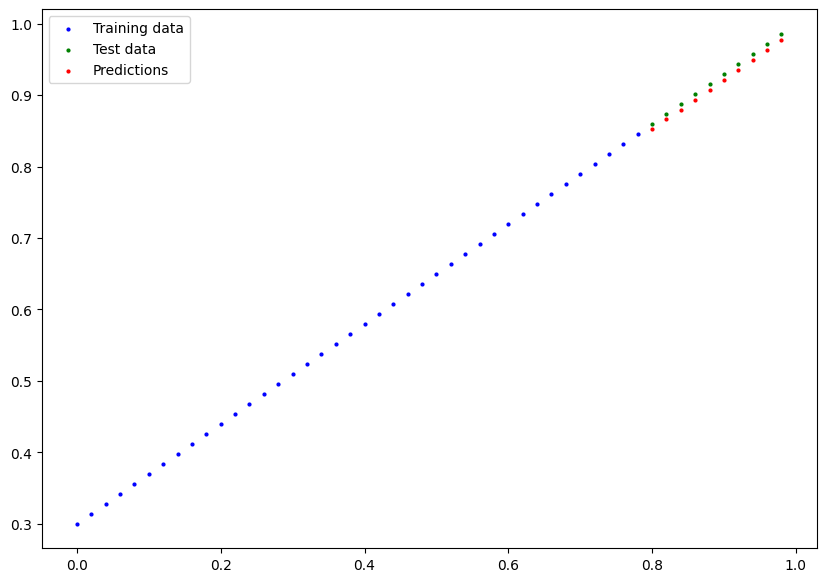

In [ ]:
loss_fn= nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr=0.01)

epochs=1000
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

  with torch.inference_mode():
    y_pred_new = model_0(X_test)

  if epoch % 10 == 0:
    print(f'epoch = {epoch}, loss={loss}')
plot_prediction(predictions= y_pred_new)



epochs=1000
for epoch in range(epochs):
  model_0.train()
  y_pred= model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad
  loss.backward()
  optimizer.step()
  with torch.inference_mode():
    y_pred_new = model_0(X_test)
    test_loss = loss_fn(y_pred_new, y_test)
  if epoch%50 == 0:
    print(f'Epoch:{epoch}, loss:{loss}, test loss:{test_loss}')




In [ ]:
from pathlib import Path
MODEL_PATH= Path('Models')
MODEL_PATH.mkdir(parents= True, exist_ok= True)
MODEL_NAME= '01Pytorch_wokflow_model.pth'
MODEL_SAVE_PATH= MODEL_PATH/ MODEL_NAME
print(f'Sucessfully saved: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Sucessfully saved: Models/01Pytorch_wokflow_model.pth


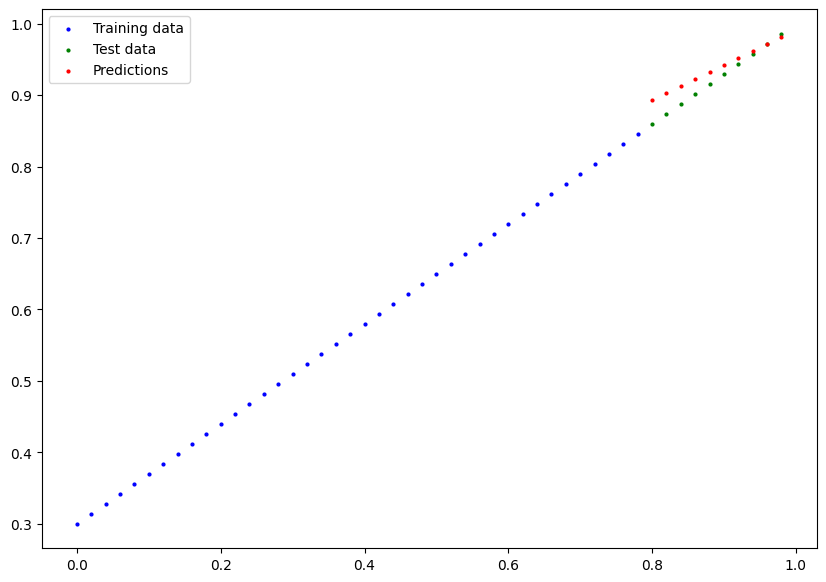

In [ ]:
Load_model_0 = LinearRegressionModel()
Load_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

Load_model_0.state_dict()
with torch.inference_mode():
  test_pred= Load_model_0(y_test)
plot_prediction(predictions=test_pred)




# New Section

# New Section

# New Section

# New Section